In [1]:
import sys, pandas
import uproot
# import HDFStore
import matplotlib.pyplot as plt

In [19]:
filename = "../ntuplesPixel/debugHits_MC_ZMM_CluRefFull_BIS.root"
plot_dir = "../ntuplesPixel/plots/" + filename.split("_")[-2] + "/"
print(plot_dir)
file = uproot.open(filename)

../ntuplesPixel/plots/CluRefFull/


In [3]:
file.allkeys()

[b'clusterInfo;1', b'clusterInfo/tree;9', b'clusterInfo/tree;8']

In [4]:
tree = file[b'clusterInfo/tree;9']

In [5]:
tree.keys()

[b'run',
 b'lumi',
 b'bx',
 b'instLumi',
 b'npv',
 b'pair_mass',
 b'track_pt',
 b'track_eta',
 b'track_phi',
 b'track_global_phi',
 b'track_global_z',
 b'track_local_x',
 b'track_local_y',
 b'track_exp_sizeX',
 b'track_exp_sizeY',
 b'track_exp_charge',
 b'hit_global_phi',
 b'hit_global_z',
 b'hit_local_x',
 b'hit_local_y',
 b'hit_firstpixel_x',
 b'hit_firstpixel_y',
 b'hit_sizeX',
 b'hit_sizeY',
 b'hit_chi2',
 b'hit_charge',
 b'pv_ndof',
 b'pv_z0',
 b'tag_dz',
 b'tag_dxy',
 b'pv_xyErr',
 b'pv_zErr',
 b'track_dz',
 b'track_dxy',
 b'track_dzErr',
 b'track_dxyErr',
 b'detid',
 b'roc',
 b'source_det',
 b'source_layer',
 b'hitFound',
 b'hitOnTrack',
 b'hitInRandomWindow',
 b'hitInRandomWindowDistance',
 b'detIsActive',
 b'maybeBadROC',
 b'trackHasHit',
 b'trackHasLostHit',
 b'track_alpha',
 b'track_beta',
 b'cluster_center_x',
 b'cluster_center_y',
 b'cluster_charge_in_hits',
 b'cluster_column_ON',
 b'cluster_chargeBroken_in_hits',
 b'cluster_columnBroken_ON',
 b'trackfromPV_global_phi',
 b

In [6]:
# tree.pandas.df().to_pickle("debugHits_MC_ZMM_CluRefFull_BIS.pkl")
print("%s in %s contains %d ntuples." % (tree.name, filename, len(tree)))

b'tree' in ../ntuplesPixel/debugHits_MC_ZMM_CluRefFull_BIS.root contains 295316 ntuples.


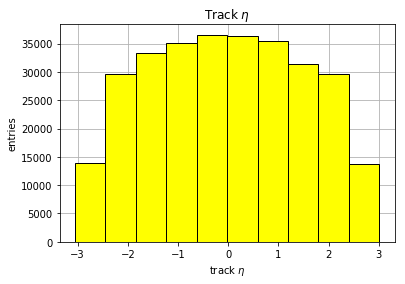

In [32]:
plt.hist(tree[b'track_eta'].array(), facecolor='yellow', ec='black')
plt.xlabel('track $\eta$')
plt.ylabel('entries')
plt.title('Track $\eta$')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.rc('axes', axisbelow=True)
plt.grid(True)
plt.savefig(plot_dir + "track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "track_eta.png", format="png", dpi=300)
plt.show()

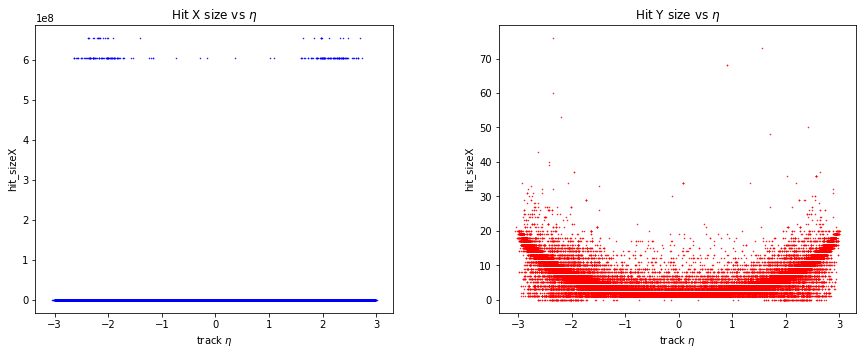

In [33]:
plt.subplot(1,2,1)
plt.scatter(tree[b'track_eta'].array(),tree[ b'hit_sizeX'].array(), marker='.', color='blue', s=1)
plt.xlabel('track $\eta$')
plt.ylabel('hit_sizeX')
plt.title('Hit X size vs $\eta$')
plt.subplot(1,2,2)
plt.scatter(tree[b'track_eta'].array(),tree[ b'hit_sizeY'].array(), marker='.', color='red', s=1)
plt.xlabel('track $\eta$')
plt.ylabel('hit_sizeX')
plt.title('Hit Y size vs $\eta$')
plt.tight_layout()
plt.subplots_adjust(bottom=0.0, top= 1.0, left=0.1, right=2.0)

plt.show()

Hit X size seems to be close to zero, while hit Y size seems to correlate with $\eta$.
We expect in fact "longer" clusters with the increasing of $\eta$ since we are getting far from the IP.

Some events at around $|\eta| \in [2,3]$ are strange because they have an extremely high hit size in x direction. We try to exclude them to see the behavior of hit X size for small size.

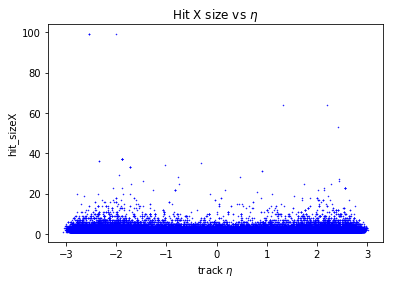

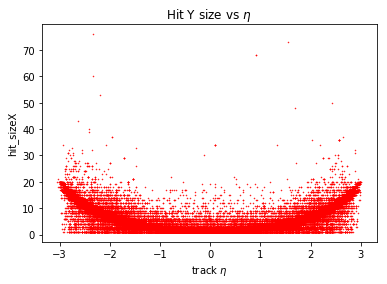

,track_eta,hit_sizeX,hit_sizeY
track_eta,1.000000,-0.009638,-0.039844
hit_sizeX,-0.009638,1.000000,0.194658
hit_sizeY,-0.039844,0.194658,1.000000


In [34]:
df_all = tree.pandas.df([b'track_eta',b'hit_sizeX',b'hit_sizeY'])
df_all.head()

df_all = df_all.query('hit_sizeX < 1e6')

#plt.subplot(1,2,1)
plt.scatter(df_all['track_eta'],df_all['hit_sizeX'], marker='.', color='blue', s=1)
plt.xlabel('track $\eta$')
plt.ylabel('hit_sizeX')
plt.title('Hit X size vs $\eta$')
plt.savefig(plot_dir + "hit_sizeX_vs_track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "hit_sizeX_vs_track_eta.png", format="png", dpi=300)
plt.show()

#plt.subplot(1,2,2)
plt.scatter(df_all['track_eta'],df_all['hit_sizeY'], marker='.', color='red', s=1)
plt.xlabel('track $\eta$')
plt.ylabel('hit_sizeX')
plt.title('Hit Y size vs $\eta$')
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.0, top= 1.0, left=0.1, right=2.0)
plt.savefig(plot_dir + "hit_sizeY_vs_track_eta.pdf", format="pdf")
plt.savefig(plot_dir + "hit_sizeY_vs_track_eta.png", format="png", dpi=300)
plt.show()


df_all.corr()

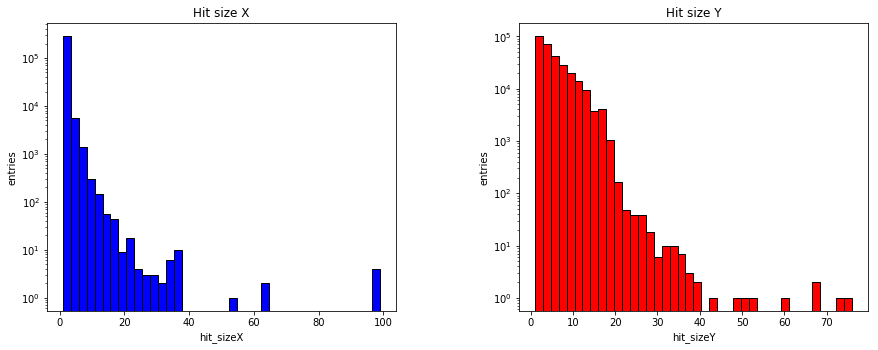

In [14]:
plt.subplot(1,2,1)
plt.hist(df_all['hit_sizeX'], bins=40, facecolor='blue', ec='black', log=True)
plt.xlabel('hit_sizeX')
plt.ylabel('entries')
plt.title('Hit size X')

plt.subplot(1,2,2)
plt.hist(df_all['hit_sizeY'], bins=40, facecolor='red', ec='black', log=True)
plt.xlabel('hit_sizeY')
plt.ylabel('entries')
plt.title('Hit size Y')

#plt.rc('axes', axisbelow=True)
#plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.0, top= 1.0, left=0.1, right=2.0)
plt.show()

(array([2.94782e+05, 2.53000e+02, 2.80000e+01, 1.80000e+01, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ],
       dtype=float32),
 <a list of 10 Patch objects>)

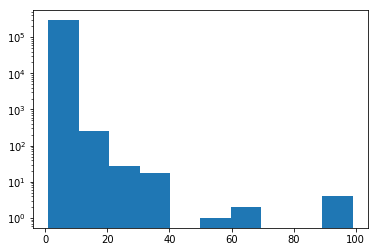

In [16]:
df_sel = df_all.loc[(df_all['hit_sizeX'] < 1e6) ]
df_sel.head()
plt.hist( df_sel['hit_sizeX'], log = True )

(array([2.29966e+05, 5.98500e+04, 5.34400e+03, 1.15000e+02, 3.00000e+01,
        3.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([1.5447e-41, 7.6000e+00, 1.5200e+01, 2.2800e+01, 3.0400e+01,
        3.8000e+01, 4.5600e+01, 5.3200e+01, 6.0800e+01, 6.8400e+01,
        7.6000e+01], dtype=float32),
 <a list of 10 Patch objects>)

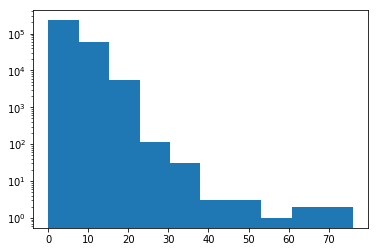

In [17]:
df_sel = df_all.loc[(df_all['hit_sizeY'] < 1e6) ]
df_sel.head()
plt.hist( df_sel['hit_sizeY'], log = True )

In [39]:
df_hit = tree.pandas.df([b'All_hits_charge', b'All_hits_Px', b'All_hits_Py', 
                         b'cluster_center_x', b'cluster_center_y', 
                         b'hit_sizeX', b'hit_sizeY',
                         b'track_eta',b'track_phi',
                         b'track_local_x', b'track_local_y',
                         b'track_exp_sizeX', b'track_exp_sizeY', b'track_exp_charge',

                         ])
df_hit.count()
# df_sel = df_all.loc[(df_all['hit_sizeX'] < 1e6) ]

All_hits_charge     41860561
All_hits_Px         41860561
All_hits_Py         41860561
cluster_center_x    41860561
cluster_center_y    41860561
hit_sizeX           41860561
hit_sizeY           41860561
dtype: int64

(array([4.1805245e+07, 4.4036000e+04, 4.5880000e+03, 4.9270000e+03,
        0.0000000e+00, 3.6900000e+02, 2.9400000e+02, 0.0000000e+00,
        0.0000000e+00, 1.1020000e+03]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ],
       dtype=float32),
 <a list of 10 Patch objects>)

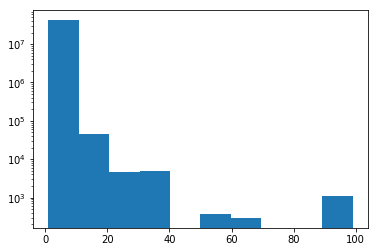

In [37]:
plt.hist(df_hit['hit_sizeX'], log=True)

(array([3.3475745e+07, 7.4219110e+06, 9.3273100e+05, 2.1399000e+04,
        5.6530000e+03, 8.7900000e+02, 7.7000000e+02, 3.4500000e+02,
        5.7700000e+02, 5.5100000e+02]),
 array([ 1. ,  8.5, 16. , 23.5, 31. , 38.5, 46. , 53.5, 61. , 68.5, 76. ],
       dtype=float32),
 <a list of 10 Patch objects>)

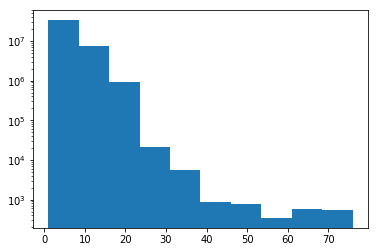

In [38]:
plt.hist(df_hit['hit_sizeY'], log=True)

(array([3894099., 4093708., 4149499., 4242553., 4450959., 4538388.,
        4319061., 4130155., 4051966., 3990173.]),
 array([  0. ,  15.9,  31.8,  47.7,  63.6,  79.5,  95.4, 111.3, 127.2,
        143.1, 159. ]),
 <a list of 10 Patch objects>)

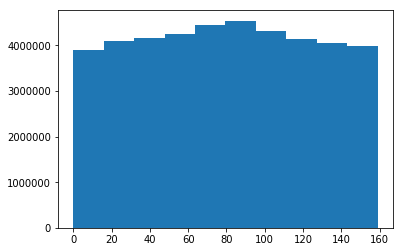

In [22]:
plt.hist(df_hit['All_hits_Px'])

(array([4173473., 4145762., 4259255., 4162030., 4225481., 4101477.,
        4247448., 4126569., 4248160., 4170906.]),
 array([  0. ,  41.5,  83. , 124.5, 166. , 207.5, 249. , 290.5, 332. ,
        373.5, 415. ]),
 <a list of 10 Patch objects>)

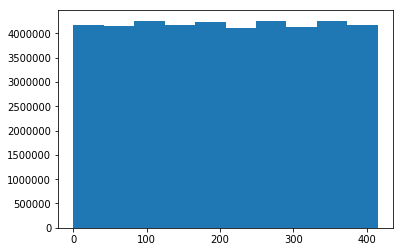

In [23]:
plt.hist(df_hit['All_hits_Py'])

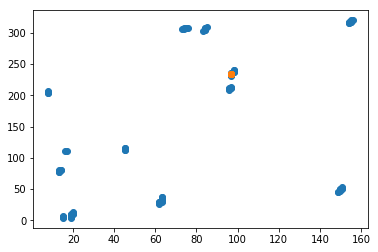

In [29]:
plt.scatter(df_hit['All_hits_Px'][0],df_hit['All_hits_Py'][0])
plt.scatter(df_hit['cluster_center_x'][0],df_hit['cluster_center_y'][0])

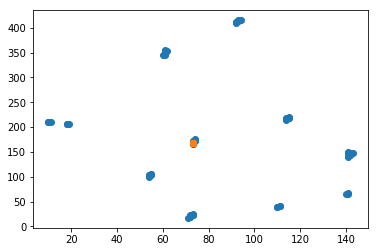

In [30]:
plt.scatter(df_hit['All_hits_Px'][1],df_hit['All_hits_Py'][1])
plt.scatter(df_hit['cluster_center_x'][1],df_hit['cluster_center_y'][1])